In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [14]:
df = pd.read_csv("processed_dataset.csv")

In [16]:
df.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_worked_at_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Clustering


##### Here we aim to divide the employees who left into clusters based on their satisfaction level and ratings in the last evaluation. We'll employ in the K-means clustering algorithm for this

### Choosing the necessary features

In [19]:
df = df[['satisfaction_level','last_evaluation','left']]

In [21]:
df.head()

,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1


In [23]:
left_employees = df[df['left'] == 1]
left_employees.head()

,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1


### Importing Libraries for Clustering

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

### Scaling the features

In [27]:
scaler = StandardScaler()
X = left_employees.drop(columns = ['left'])
scaled_features = scaler.fit_transform(X)

### Applying KMeans

In [29]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(scaled_features)
left_employees['cluster_label'] = kmeans.labels_

C:\Users\adity\AppData\Local\Temp\ipykernel_40148\988485386.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_employees['cluster_label'] = kmeans.labels_


In [31]:
left_employees.head()

,satisfaction_level,last_evaluation,left,cluster_label
0,0.38,0.53,1,0
1,0.80,0.86,1,1
2,0.11,0.88,1,2
3,0.72,0.87,1,1
4,0.37,0.52,1,0


### Plotting the Clusters for Visualization

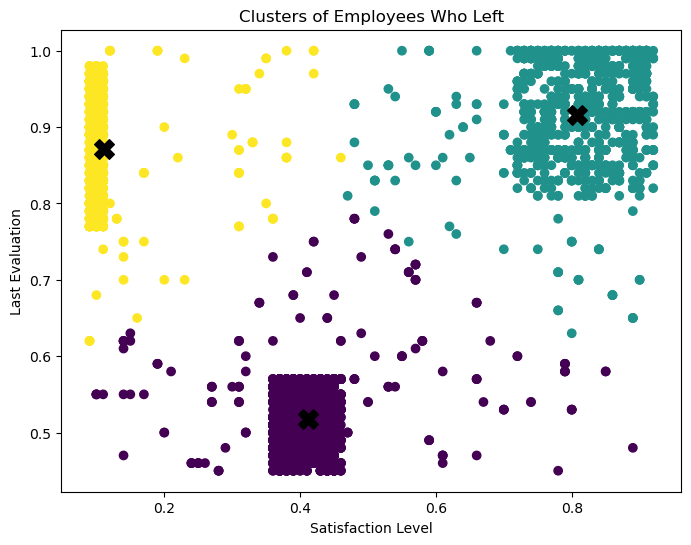

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(left_employees['satisfaction_level'], left_employees['last_evaluation'], c=left_employees['cluster_label'], cmap='viridis')
plt.xlabel("Satisfaction Level")
plt.ylabel("Last Evaluation")
plt.title("Clusters of Employees Who Left")

centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.show()

### Using the Elbow Method to find the optimal number of clusters for KMeans

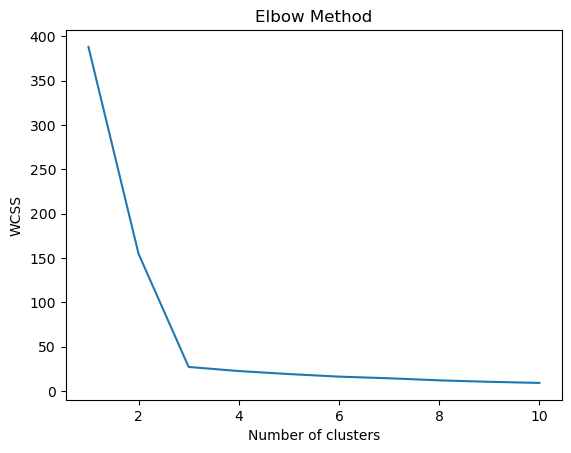

In [35]:
# Use the elbow method to find the optimal number of clusters
wcss = [] # Within-Cluster-Sum-of-Squares (WCSS)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the results
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##### We can see from the above graph that there is a sharp change in the slop of Within Cluster Sum of Squares(WCSS) at Number of clusters = 3, so the optimal number of clusters for KMeans algorithm would be 3 which is the value that we have already chosen